In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analisando o Dataset

In [5]:
train = pd.read_csv("titanic_train.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

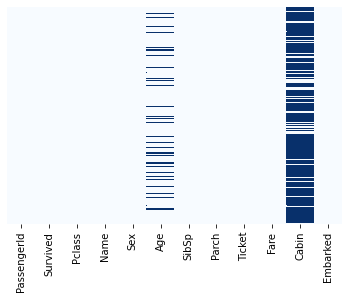

In [8]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar = False, cmap = "Blues") #maneira de ver se está faltando data

<AxesSubplot:xlabel='Survived', ylabel='count'>

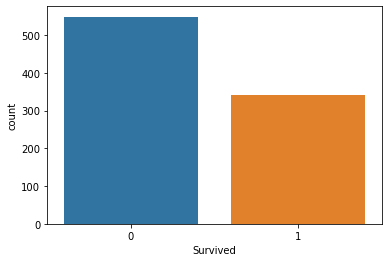

In [9]:
sns.countplot(x= "Survived", data= train) #mais pessoas morreram 

<AxesSubplot:xlabel='Survived', ylabel='count'>

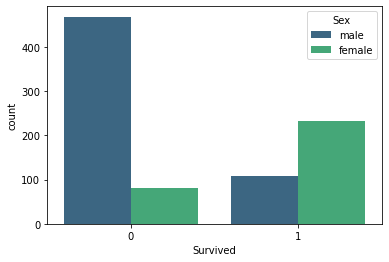

In [10]:
sns.countplot(x= "Survived", data = train, hue= "Sex", palette = "viridis") #dos que morreram a maioria era homem

<AxesSubplot:xlabel='Survived', ylabel='count'>

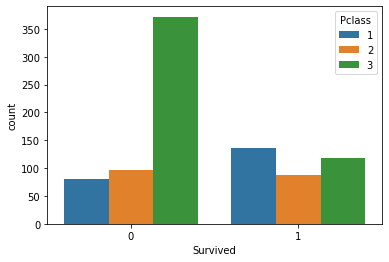

In [11]:
sns.countplot(x= "Survived", data = train, hue = "Pclass") #a maioria dos que morreram eram da 3 classe

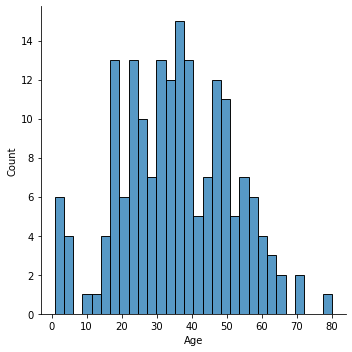

In [12]:
sns.displot(x="Age", data= train.dropna(), bins = 30) #vemos uma idade entre 20-40

<AxesSubplot:xlabel='SibSp', ylabel='count'>

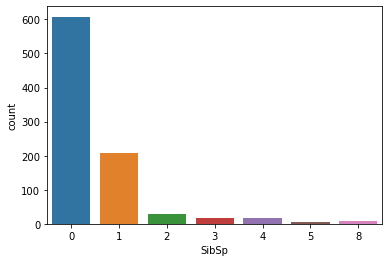

In [13]:
sns.countplot(x= "SibSp", data = train) #a maioria das pessoas eram solteiros 

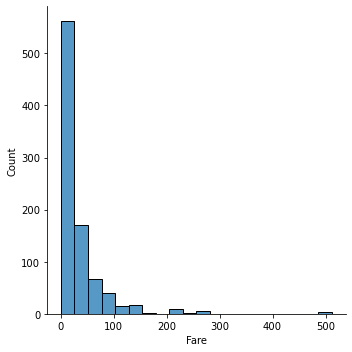

In [14]:
sns.displot(x= "Fare", data = train, bins=20)

# limpando o dataset

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

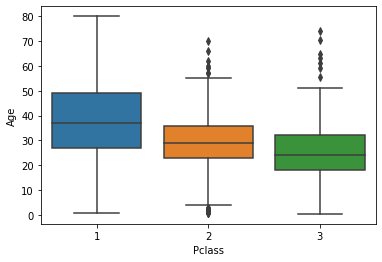

In [15]:
sns.boxplot(x= "Pclass", y= "Age", data= train)

In [16]:
# conseguimos observar que as idades dos passageiros são diferentes para cada classe 

In [17]:
def fill_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
train["Age"] = train[["Age","Pclass"]].apply(fill_age,axis=1)

<AxesSubplot:>

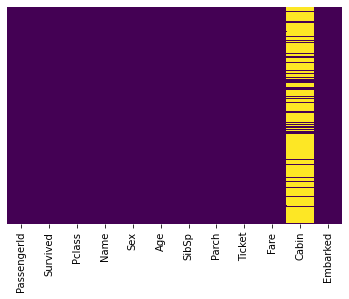

In [19]:
sns.heatmap(data= train.isnull(), cmap= "viridis", cbar= False, yticklabels= False)

In [20]:
train.drop("Cabin", axis=1, inplace = True)

In [21]:
train.dropna(inplace = True)

<AxesSubplot:>

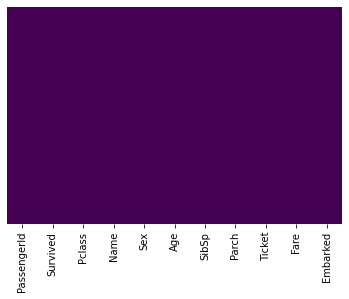

In [22]:
sns.heatmap(data= train.isnull(), cmap= "viridis", cbar= False, yticklabels= False)

In [23]:
# agora temos que transformar as variáveis categoricas como sexo, em dummie varials 

In [24]:
sex = pd.get_dummies(data=train["Sex"],drop_first= True) #aqui temos um problema que uma coluna é o exato oposto da outra, por isso usamos drop

In [25]:
embark = pd.get_dummies(data= train["Embarked"], drop_first= True) #aqui as 3 colunas são os exatos opostos, por isso dropamos apenas 1 

In [26]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
train = pd.concat([train, sex, embark], axis = 1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [29]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace = True)

In [30]:
train.head() #perfeito para fazer ML, todos os dados são numéricos, tudo concatenda, e as colunas funcionando perfeito

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
train.drop(labels = ["PassengerId"], axis=1, inplace= True)

In [32]:
train.head() # o passenger ID não seria utilizado para o ML

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Train the model

In [33]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [34]:
X= train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y= train["Survived"]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression(max_iter=10000)

In [39]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [43]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)

Agora Vamos ver se eu sobreviveria ao titanic!

In [66]:
arr = [3,24,0,0,8.5,1,1,0]

In [67]:
arr = np.array(arr)

In [68]:
arr.reshape(1,8)

array([[ 3. , 24. ,  0. ,  0. ,  8.5,  1. ,  1. ,  0. ]])

In [69]:
logmodel.predict(arr.reshape(1,8))

array([0], dtype=int64)

Infelizmente eu provavelmente teria morrido!